# OTC curve (for pixel images)

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
from skimage import io
import matplotlib.pyplot as plt

from PixelOTC import PixelOTC

### data

In [3]:
# # toy data 

# m = 10
# n = 10
# imA = np.zeros((m, n))
# imB = np.zeros((m, n))
# imA[0, 0] = 1
# imA[0, -1] = 1
# imA[-1, 0] = 1
# imB[5, 5] = 1
# imB[-1, -1] = 1

# fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(8, 6))

# axs[0].imshow(imA, origin='lower')
# axs[1].imshow(imB, origin='lower')

# fig.tight_layout()
# plt.show()

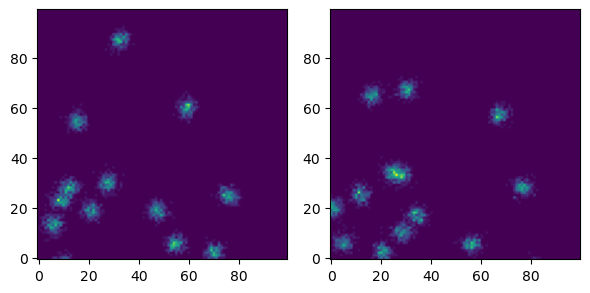

In [4]:
imA = io.imread('example_data/nanoruler_chA.tif')
imB = io.imread('example_data/nanoruler_chB.tif')

imA = imA[100:200, 100:200]
imB = imB[100:200, 100:200]

fig, axs = plt.subplots(ncols=2, figsize=(6, 4))

axs[0].imshow(imA, origin='lower')
axs[1].imshow(imB, origin='lower')

fig.tight_layout()
plt.show()

### solve and plot

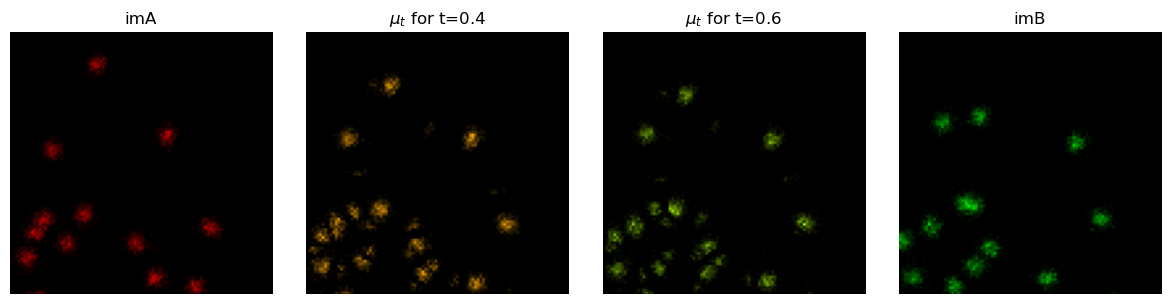

In [5]:
otc_instance = PixelOTC(
    imA, 
    imB, 
    unbalanced=False, 
    lam=10,  # regularization for *unbalanced* OT, no effect if unbalanced=False
)

pi, optimal_cost = otc_instance.solve()

otc_instance.plot(ts=[0.4, 0.6])

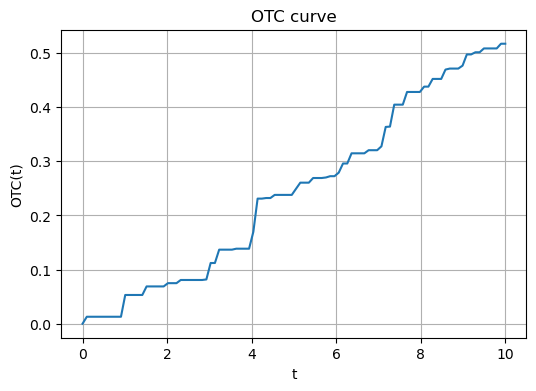

In [6]:
otc_instance.plot_otc_curve(dists=np.linspace(0, 10, 100))

### GIF

In [7]:
otc_instance.make_gif(filename='geodesic.gif')

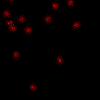

In [8]:
from IPython.display import Image as IPImage

IPImage('geodesic.gif')

### slider

Run the following for interactive plots in jupyter notebooks:
```
    %matplotlib notebook
```
Additional required packages:
- `ipympl`

**Note:**
In VS Code 
```
    %matplotlib widget
``` 
works better.

In [9]:
# !pip install ipympl
%matplotlib widget 

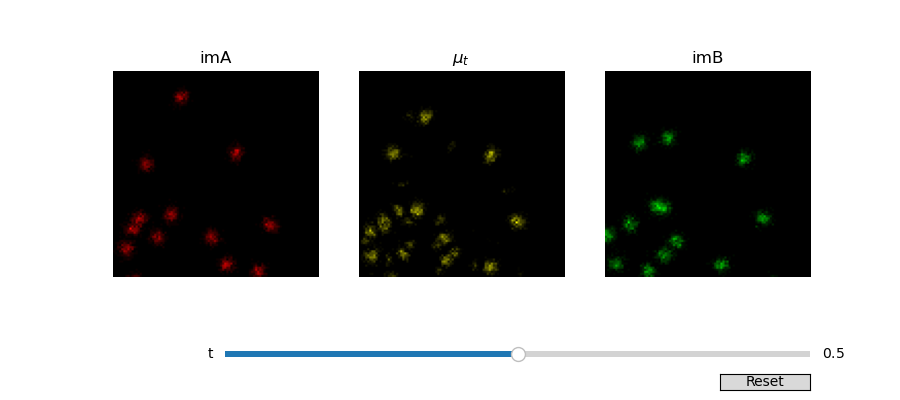

In [10]:
# important NOTE: 
# For the slider and button to remain responsive you must maintain a reference 
# of them. That is why we store the variables `slider` and `button`.
slider, button = otc_instance.slider_plot()

**NOTE**

For large images, it is recommended to click on the slider instead of sliding it.